# <div style="text-align:center"> $B^{\pm} \xrightarrow{} \pi^+ \pi^- \pi^{\pm}$ </div>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TChain *B2HHH = new TChain("DecayTree");
B2HHH->Add("data/B2HHH_MagnetUp.root");
B2HHH->Add("data/B2HHH_MagnetDown.root");

// B2HHH->Print()

//--------- DECLARING AND DEFINING THE DATASET VARIABLES
Double_t B_FlightDistance;          Double_t B_VertexChi2;

Int_t H1_isMuon;         Int_t H2_isMuon;          Int_t H3_isMuon;
Int_t H1_Charge;         Int_t H2_Charge;          Int_t H3_Charge;
Double_t H1_IPChi2;      Double_t H2_IPChi2;       Double_t H3_IPChi2;
Double_t H1_PX;          Double_t H2_PX;           Double_t H3_PX;
Double_t H1_PY;          Double_t H2_PY;           Double_t H3_PY;
Double_t H1_PZ;          Double_t H2_PZ;           Double_t H3_PZ;
Double_t H1_ProbPi;      Double_t H2_ProbPi;       Double_t H3_ProbPi;
Double_t H1_ProbK;       Double_t H2_ProbK;        Double_t H3_ProbK;

B2HHH->SetBranchAddress("B_FlightDistance", &B_FlightDistance);    B2HHH->SetBranchAddress("B_VertexChi2", &B_VertexChi2);

B2HHH->SetBranchAddress("H1_isMuon", &H1_isMuon);     B2HHH->SetBranchAddress("H2_isMuon", &H2_isMuon);     B2HHH->SetBranchAddress("H3_isMuon", &H3_isMuon);
B2HHH->SetBranchAddress("H1_Charge", &H1_Charge);     B2HHH->SetBranchAddress("H2_Charge", &H2_Charge);     B2HHH->SetBranchAddress("H3_Charge", &H3_Charge);
B2HHH->SetBranchAddress("H1_IPChi2", &H1_IPChi2);     B2HHH->SetBranchAddress("H2_IPChi2", &H2_IPChi2);     B2HHH->SetBranchAddress("H3_IPChi2", &H3_IPChi2);
B2HHH->SetBranchAddress("H1_PX", &H1_PX);             B2HHH->SetBranchAddress("H2_PX", &H2_PX);             B2HHH->SetBranchAddress("H3_PX", &H3_PX);
B2HHH->SetBranchAddress("H1_PY", &H1_PY);             B2HHH->SetBranchAddress("H2_PY", &H2_PY);             B2HHH->SetBranchAddress("H3_PY", &H3_PY);
B2HHH->SetBranchAddress("H1_PZ", &H1_PZ);             B2HHH->SetBranchAddress("H2_PZ", &H2_PZ);             B2HHH->SetBranchAddress("H3_PZ", &H3_PZ);
B2HHH->SetBranchAddress("H1_ProbPi", &H1_ProbPi);     B2HHH->SetBranchAddress("H2_ProbPi", &H2_ProbPi);     B2HHH->SetBranchAddress("H3_ProbPi", &H3_ProbPi);
B2HHH->SetBranchAddress("H1_ProbK", &H1_ProbK);       B2HHH->SetBranchAddress("H2_ProbK", &H2_ProbK);       B2HHH->SetBranchAddress("H3_ProbK", &H3_ProbK);

//---------OTHER DEFINITIONS

double B_m  = 5279.38;    // B meson mass in MeV
double Pi_m = 139.57039;  // MeV
double K_m  = 493.677;    // MeV
double D0m  = 1864.84;    // MeV

int nentries, nbytes, i;
nentries = (Int_t)B2HHH->GetEntries();

//----------------------------------//----------------------------------//----------------------------------
//----------------------------------//----------------------------------//----------------------------------
//--------- CONTROL PANEL
double D0_thresh  = 30.;    double B_thresh   = 40.;     // D0 exclusion and B mass window thresholds
double min_prob_pi = 0.75;  double max_prob_ka = 0.25; 

//--------- HISTOGRAM DEFINITIONS
int dpxbins = 14;  int dpybins = 14;

TH2F *whole = new TH2F("whole","whole sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,25, dpybins, 0, 35);
TH1F *h_Mlowplus_focused  = new TH1F("h_Mlowplus_focused", "m_{low}^{2}; m_{#pi#pi low}^{2} [GeV^{2}/c^{4}]; Candidates/(0.10 GeV^{2}/c^{4})",25,0,2.5);
TH1F *h_Mlowminus_focused = new TH1F("h_Mlowminus_focused","m_{low}^{2}; m_{#pi#pi low}^{2} [GeV^{2}/c^{4}]; Events",25,0,2.5);

TH1F *h_Bmass_first= new TH1F("h_Bmass_first","Bmass; M(MeV/c^{2}); Events",60,5000,5500);
TH1F *h_Bmass_raw  = new TH1F("h_Bmass_raw","Bmass; m(MeV); Events",60,5000,5500);
TH1F *h_Bmass      = new TH1F("h_Bmass","Bmass; m(MeV); Events",60,5000,5500);
TH1F *h_Bmass_bckgd= new TH1F("h_Bmass_bckgd","Bmass; m(MeV); Events",60,5000,5500);

TH1F *h_Mlowplus   = new TH1F("h_Mlowplus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mlowminus  = new TH1F("h_Mlowminus","m_{low}^{2}; m(GeV); Events",80,0,15);
TH1F *h_Mhighplus  = new TH1F("h_Mhighplus","m_{high}^{2}; m(GeV); Events",80,0,30);
TH1F *h_Mhighminus = new TH1F("h_Mhighminus","m_{high}^{2}; m(GeV); Events",80,0,30);
TH2F *h_Bplus      = new TH2F("h_Bplus","B^{+}; m12^{2}; m13^{2}",20,0,20, 20, 0, 35);
TH2F *h_Bminus     = new TH2F("h_Bminus","B^{-}; m12^{2}; m13^{2}",20,0,20, 20, 0, 35);
TH2F *h_Bplus_sym  = new TH2F("h_Bplus_sym","B^{+} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,20, dpybins, 0, 35);
TH2F *h_Bminus_sym = new TH2F("h_Bminus_sym","B^{-} sym; Mlow^{2}; Mhigh^{2}",dpxbins,0,20, dpybins, 0, 35); 

TH1F *new_pls = new TH1F("new_pls", "m_{low}^{2}; m_{#pi#pi low}^{2} [GeV^{2}/c^{4}]; Candidates/(0.10 GeV^{2}/c^{4})",25,0,2.5);
TH1F *new_min = new TH1F("new_min","m_{low}^{2}; m_{#pi#pi low}^{2} [GeV^{2}/c^{4}]; Events",25,0,2.5);

// Creating a CSV to write data
FILE *fp;
fp = fopen("PPP.csv","w");

In [2]:
void fun(double X, double Y, double M){
    if(H1_Charge == -1) {
        h_Mlowplus->Fill(Y*Y/1e6);   h_Mhighplus->Fill(X*X/1e6);
        h_Bplus_sym->Fill(Y*Y/1e6,X*X/1e6); 
        whole->Fill(Y*Y/1e6,X*X/1e6);  h_Bmass->Fill(M,1);
        fprintf(fp, "%f,%f\n", Y*Y/1e6,X*X/1e6);
        if(X*X > 15e6) {h_Mlowplus_focused->Fill(Y*Y/1e6);}      
        if(X*X > 15e6 && Y*Y<0.4e6) {new_pls->Fill(Y*Y/1e6);}      
    }
    if(H1_Charge == 1) {
        h_Mlowminus->Fill(Y*Y/1e6);   h_Mhighminus->Fill(X*X/1e6);
        h_Bminus_sym->Fill(Y*Y/1e6,X*X/1e6); 
        whole->Fill(Y*Y/1e6,X*X/1e6);  h_Bmass->Fill(M,1);
        fprintf(fp, "%f,%f\n", Y*Y/1e6,X*X/1e6);
        if(X*X > 15e6) {h_Mlowminus_focused->Fill(Y*Y/1e6);}
        if(X*X > 15e6 && Y*Y<0.4e6) {new_min->Fill(Y*Y/1e6);}
    }      
}

In [3]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < min_prob_pi || H2_ProbPi < min_prob_pi || H3_ProbPi < min_prob_pi) continue;
    if(H1_ProbK  > max_prob_ka || H2_ProbK  > max_prob_ka || H3_ProbK  > max_prob_ka) continue;    
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Pion2;      vec_array[1] = Pion3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Pion1 + vec_array[r]).M();     double M13 = (Pion1 + vec_array[1-r]).M();
    
    double PT    = (Pion1 + Pion2 + Pion3).Pt();
    double Bmass = (Pion1 + Pion2 + Pion3).M();  h_Bmass_first->Fill(Bmass,1);
    
    h_Bmass_raw->Fill(Bmass,1);

    if(Bmass < B_m + B_thresh && Bmass > B_m - B_thresh && PT > 1700) { // B Pt and Mass cuts
//     if(PT > 1700) { // B Pt cut
    
        if( (M12 < D0m - D0_thresh || M12 > D0m + D0_thresh) && (M13 < D0m - D0_thresh || M13 > D0m + D0_thresh) ){ // D0 exclusion
            
            if(M12 > M13) fun(M12,M13,Bmass);
            else          fun(M13,M12,Bmass); 

        }
        else h_Bmass_bckgd->Fill(Bmass,1);
    }
    else h_Bmass_bckgd->Fill(Bmass,1);
}

// Closing the CSV
fclose(fp);
fp = 0;

// READING CSV AND STORING DATA IN VECTORS
ifstream data;
data.open("PPP.csv");
int data_rows = whole->GetEntries();

vector <double> x(data_rows), y(data_rows);
string string1, string2; 

for(int i = 0; i < data_rows; ++i) {
    getline(data, string1, ',');   x[i] = stod(string1);
    getline(data, string2, '\n');  y[i] = stod(string2);
}

data.close();

# Working out the adaptive binning

In [4]:
// DEFINING BIN OBJECT AND A VECTOR OF IT
struct Bin{
    bool binOn = false;
    double xmin = 0.0, xmax = 0.0, ymin = 0.0, ymax = 0.0;
};
vector<Bin> vecBin(500);

In [5]:
void setBin(int i, bool Active, double x, double X, double y, double Y){
    vecBin[i].binOn = Active;
    vecBin[i].xmin = x;   vecBin[i].xmax = X; 
    vecBin[i].ymin = y;   vecBin[i].ymax = Y;
}

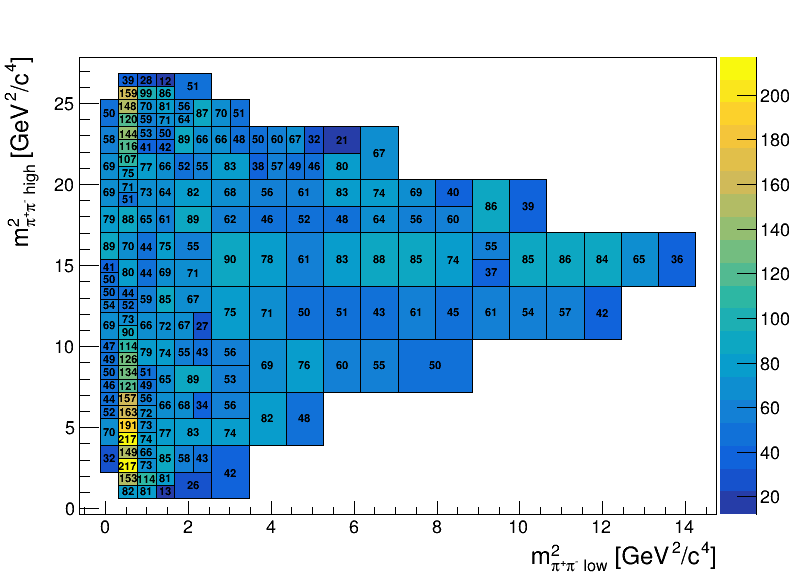

NUMBER OF BINS: 194


In [6]:
double border = .2;
double min_x = *min_element(x.begin(), x.end()) - border, max_x = *max_element(x.begin(), x.end()) + border;  
double min_y = *min_element(y.begin(), y.end()) - border, max_y = *max_element(y.begin(), y.end()) + border;

setBin(0, true, min_x, max_x, min_y, max_y);  // INITIAL BIN

int iterations   = 5;
int entry_thresh = 90;
int next_bin = 1, current_bins = 1;

// MAIN ALGORITHM
for(int itr = 0; itr < iterations; ++itr) {
    
    for(int bin = 0; bin < current_bins; ++bin){
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaX = (vecBin[bin].xmax - vecBin[bin].xmin)/2;
            setBin(next_bin, true, vecBin[bin].xmin + deltaX, vecBin[bin].xmax, vecBin[bin].ymin, vecBin[bin].ymax);
            vecBin[bin].xmax = vecBin[bin].xmin + deltaX;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }
    current_bins = next_bin;
    
    for(int bin = 0; bin < current_bins; ++bin){
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaY = (vecBin[bin].ymax - vecBin[bin].ymin)/2;
            setBin(next_bin, true, vecBin[bin].xmin, vecBin[bin].xmax, vecBin[bin].ymin + deltaY, vecBin[bin].ymax);
            vecBin[bin].ymax = vecBin[bin].ymin + deltaY;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }
    current_bins = next_bin;
}

for(int bin = 0; bin < current_bins; ++bin){
    int counter = 0;
    for(int i = 0; i < size(x); ++i){
        if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
            counter++;
    }
    if(counter < 8) vecBin[bin].binOn = false;
    if((counter == 41 || counter == 47 || counter == 23) && vecBin[bin].xmax > 2.5) vecBin[bin].binOn = false;
}


// -------------------------------------------------------------------------- PLOT
TH2Poly *h2p = new TH2Poly("whole","; m_{#pi^{+}#pi^{-} low}^{2} [GeV^{2}/c^{4}]; m_{#pi^{+}#pi^{-} high}^{2} [GeV^{2}/c^{4}]",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}
for(int i = 0; i < size(x); ++i)       h2p->Fill(x[i], y[i]);

TCanvas *c1 = new TCanvas("c1","c1",800,600);
h2p->SetStats(0);
h2p->Draw("text COLZ1");
h2p->GetXaxis()->SetTitleSize(.046);  h2p->GetYaxis()->SetTitleSize(.046);
c1->Draw();

cout << "NUMBER OF BINS: " << h2p->GetNcells() << endl;

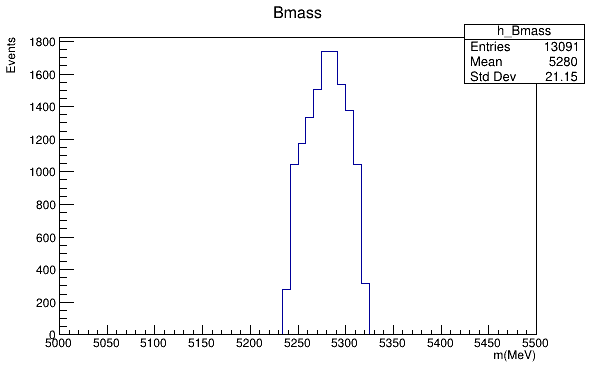

In [7]:
TCanvas *c1 = new TCanvas("Canvas","",600,400);
h_Bmass->SetStats(1);
h_Bmass->Draw();
c1->Draw()

the $Mlow^2$ variable for $Mhigh^2$ > 15 $GeV^2/c^4$ [ref](https://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html)

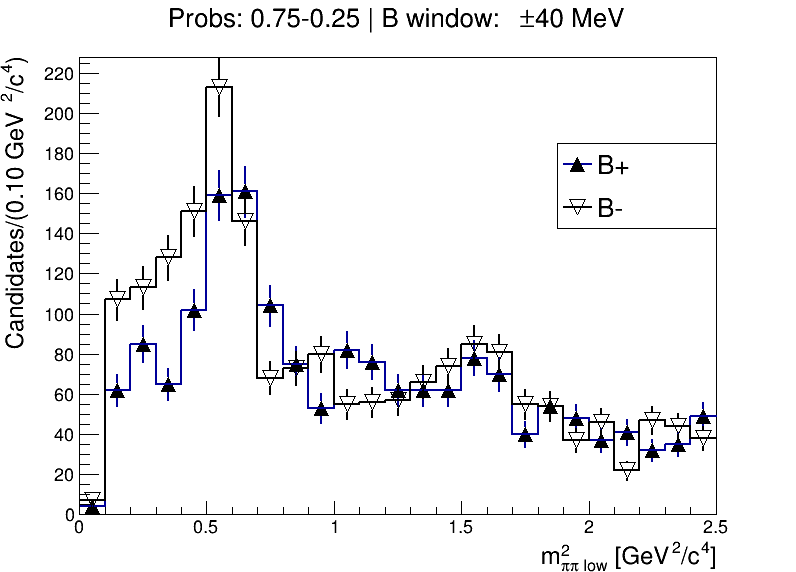

-entries: 3164 | +entries: 2996
n entries: 6160

total events: 6160
***asymmetry: 0.0272727
*uncertainty: 0.0127364
significance: 2.14131



Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [8]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

h_Mlowplus_focused->SetStats(0);
h_Mlowplus_focused->SetMarkerStyle(22);  h_Mlowplus_focused->SetMarkerSize(2);  h_Mlowplus_focused->SetMarkerColor(1);
h_Mlowminus_focused->SetMarkerStyle(32); h_Mlowminus_focused->SetMarkerSize(2); h_Mlowminus_focused->SetMarkerColor(1);

h_Mlowplus_focused->SetTitle(Form("Probs: %.2f-%.2f | B window: #pm%.f MeV", min_prob_pi, max_prob_ka, B_thresh));
h_Mlowplus_focused->SetLineWidth(2);   h_Mlowplus_focused->Draw("hist e");
h_Mlowminus_focused->SetLineWidth(2);  h_Mlowminus_focused->Draw("samehist e");
h_Mlowminus_focused->SetLineColor(1);
h_Mlowplus_focused->GetYaxis()->SetTitleOffset(1.11);

int ymaxlim = h_Mlowminus_focused->GetBinContent(h_Mlowminus_focused->GetMaximumBin());
h_Mlowplus_focused->SetMaximum(1.07*ymaxlim);

TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_Mlowplus_focused, "B+", "l p"); leg->AddEntry(h_Mlowminus_focused, "B-", "l p"); leg->Draw();
h_Mlowplus_focused->GetXaxis()->SetTitleSize(.046);  h_Mlowplus_focused->GetYaxis()->SetTitleSize(.046);
canvas->Draw();

////////////////
tot_entries =  h_Mlowplus_focused->GetEntries() + h_Mlowminus_focused->GetEntries();
cout << "-entries: " << h_Mlowminus_focused->GetEntries() << " | +entries: " << h_Mlowplus_focused->GetEntries() << endl;
cout << "n entries: " << tot_entries;

////////////////
Np = h_Mlowplus_focused->GetEntries();    Nm = h_Mlowminus_focused->GetEntries();
tot_events = Np + Nm;
A = (Nm - Np)/tot_events;
u = sqrt((1-A*A)/tot_events);
s = A/u;

cout<< "\n\ntotal events: " << tot_events << endl;
cout<< "***asymmetry: "    << A << endl;
cout<< "*uncertainty: "  << u << endl;
cout<< "significance: " << s << "\n\n";

focused region $m^2_{\pi\pi \ low} < 0.4 \text{ GeV}^2$

In [9]:
Np = new_pls->GetEntries();    Nm = new_min->GetEntries();
tot_events = Np + Nm;
A = (Nm - Np)/tot_events;
u = sqrt((1-A*A)/tot_events);
s = A/u;

cout<< "\n\ntotal events: " << tot_events << endl;
cout<< "***asymmetry: "    << A << endl;
cout<< "*uncertainty: "  << u << endl;
cout<< "significance: " << s << "\n\n";



total events: 571
***asymmetry: 0.243433
*uncertainty: 0.0405898
significance: 5.99738



-----------------

# Asymmetry

# <div style="text-align:center"> $A = \frac{N^- - N^+}{N^- + N^+}$ </div>

# Statistical uncertainty

# <div style="text-align:center"> $\sigma_A = \sqrt{ \frac{1 - A^2}{N^- + N^+} }  $ </div>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery"

In [10]:
TH2Poly *h2p = new TH2Poly("whole","; m_{#pi^{+}#pi^{-} low}^{2} [GeV^{2}/c^{4}]; m_{#pi^{+}#pi^{-} high}^{2} [GeV^{2}/c^{4}]",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}

double min_prob_ka = 0.8;  double max_prob_pi = 0.2;

TH2Poly *h_Bplus_sym2  = (TH2Poly*) h2p->Clone();
TH2Poly *h_Bminus_sym2 = (TH2Poly*) h2p->Clone();

In [11]:
void fun2(double X, double Y){
    if(H1_Charge == -1) h_Bplus_sym2->Fill(Y*Y/1e6,X*X/1e6);
    if(H1_Charge == 1) h_Bminus_sym2->Fill(Y*Y/1e6,X*X/1e6); 
}

In [12]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;
    if(H1_ProbPi < min_prob_pi || H2_ProbPi < min_prob_pi || H3_ProbPi < min_prob_pi) continue;
    if(H1_ProbK  > max_prob_ka || H2_ProbK  > max_prob_ka || H3_ProbK  > max_prob_ka) continue;
    
    // DEFINING AND FEEDING TLORENTZ VECTORS
    TLorentzVector Pion1  = TLorentzVector();   Pion1.SetXYZM(H1_PX, H1_PY, H1_PZ,Pi_m);  
    TLorentzVector Pion2  = TLorentzVector();   Pion2.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);  
    TLorentzVector Pion3  = TLorentzVector();   Pion3.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);   
    
    // WORKING OUT THE RANDOMIZATION
    TRandom2 *rand = new TRandom2(i);          int r = rand->Binomial(1,0.5);
    TLorentzVector *vec_array = new TLorentzVector[2];
    vec_array[0] = Pion2;      vec_array[1] = Pion3;
    
    // 2-BODY INVARIANT MASSES (NOTE RANDOMNESS)
    double M12 = (Pion1 + vec_array[r]).M();     double M13 = (Pion1 + vec_array[1-r]).M();
    
    double PT = (Pion1 + Pion2 + Pion3).Pt();
    double Bmass = (Pion1 + Pion2 + Pion3).M();
    
    if(Bmass < B_m + B_thresh && Bmass > B_m - B_thresh && PT > 1700) { // B Pt and Mass cuts
    
        if( (M12 < D0m - D0_thresh || M12 > D0m + D0_thresh) && (M13 < D0m - D0_thresh || M13 > D0m + D0_thresh) ){ // D0 exclusion
            
            if(M12 > M13) fun2(M12,M13);
            else          fun2(M13,M12); 

        }
    }
}

tot_entries =  h_Bplus_sym2->GetEntries() + h_Bminus_sym2->GetEntries();
cout << "-entries: " << h_Bminus_sym2->GetEntries() << " | +entries: " << h_Bplus_sym2->GetEntries() << endl;
cout << "n entries: " << tot_entries;

-entries: 6762 | +entries: 6182
n entries: 12944

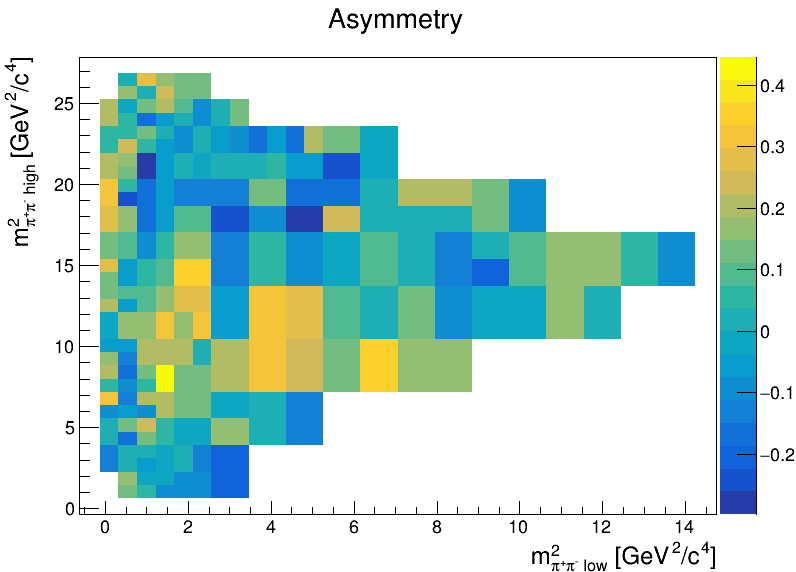

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [13]:
TH2F *Numerator = (TH2F*) h_Bminus_sym2->Clone();
TH2F *Denominator = (TH2F*) h_Bminus_sym2->Clone();
Numerator->Add(h_Bplus_sym2, -1);
Denominator->Add(h_Bplus_sym2, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");
    
TCanvas *canvas = new TCanvas("Canvas","",800,600);
Asym->SetStats(0);
Asym->Draw(" colz1");
// Asym->GetZaxis()->SetRangeUser(-0.4, 0.4);
Asym->GetXaxis()->SetTitleSize(.046);  Asym->GetYaxis()->SetTitleSize(.046);
canvas->Draw();

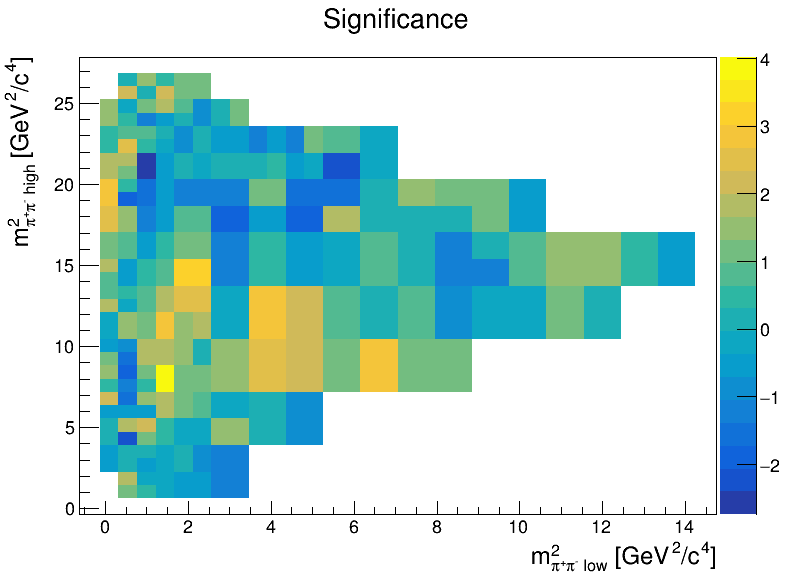

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [14]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
// TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Uncertainty->SetStats(0);
// Uncertainty->Draw("text colz");
// canvas->Draw();


TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");

Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",800,600);
// Significance->SetStats(0);
Significance->Draw("colz1");
// Significance->GetZaxis()->SetRangeUser(-3.5, 3.5);
Significance->GetXaxis()->SetTitleSize(.046);  Significance->GetYaxis()->SetTitleSize(.046);
// gStyle->SetPalette(104);
canvas->Draw();

In [15]:
Asym->GetMaximum()

(double) 0.44615385


In [16]:
Np = h_Bplus_sym2->GetEntries();    Nm = h_Bminus_sym2->GetEntries();
tot_events = Np + Nm;
A = (Nm - Np)/tot_events;
u = sqrt((1-A*A)/tot_events);
s = A/u;

cout<< "total events: " << tot_events << endl;
cout<< "***asymmetry: "    << A << endl;
cout<< "*uncertainty: "  << u << endl;
cout<< "significance: " << s << "\n\n";

double maxA = Asym->GetMaximum(), maxU = 0.0, maxS = 0.0;
double minA = Asym->GetMinimum(), minU = 0.0, minS = 0.0;
int maxN = 0, minN = 0;

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double content = Asym->GetBinContent(bin);
    if(content == maxA) {
        maxU = Uncertainty->GetBinContent(bin);
        maxS = Significance->GetBinContent(bin);
        maxN = h_Bplus_sym2->GetBinContent(bin) + h_Bminus_sym2->GetBinContent(bin);
    }
    if(content == minA) {
        minU = Uncertainty->GetBinContent(bin);
        minS = Significance->GetBinContent(bin);
        minN = h_Bplus_sym2->GetBinContent(bin) + h_Bminus_sym2->GetBinContent(bin);
    }    
}    
cout << "MAX (ASY,UNC,SIG): " << maxA << " " << maxU << " " << maxS << endl; 
cout << "MIN (ASY,UNC,SIG): " << minA << " " << minU << " " << minS << endl; 
// cout << "minN : " << minN << "maxN : " << maxN << endl; 

total events: 12944
***asymmetry: 0.0448084
*uncertainty: 0.0087807
significance: 5.10305

MAX (ASY,UNC,SIG): 0.446154 0.111006 4.0192
MIN (ASY,UNC,SIG): -0.298701 0.108758 -2.74648


# MASS ANALYSIS

Saving h_Bmass_first first so it doesn't have to be generated again

Load data

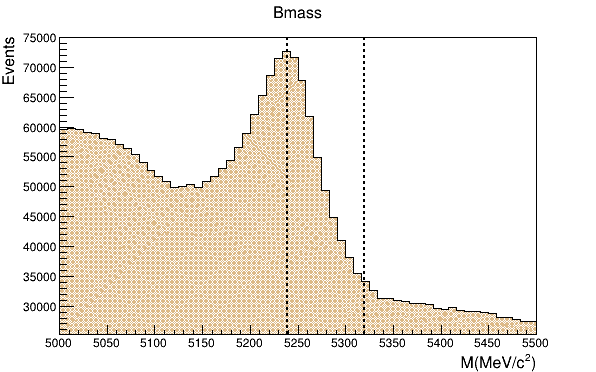

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [17]:
TFile *f = new TFile("PPP_Bmass.root");
TH1F *PPP_Bmass_ini = (TH1F*)f->Get("PPP_Bmass_ini");
TH1F *PPP_Bmass_fin = (TH1F*)f->Get("PPP_Bmass_fin");

TCanvas *canvas = new TCanvas("Canvas","",600,400);
PPP_Bmass_ini->SetStats(0);
PPP_Bmass_ini->SetLineColor(kBlack);
PPP_Bmass_ini->SetFillStyle(3144);               PPP_Bmass_ini->SetFillColor(42);
PPP_Bmass_ini->GetXaxis()->SetTitleSize(.046);   PPP_Bmass_ini->GetYaxis()->SetTitleSize(.046);
PPP_Bmass_ini->GetYaxis()->SetTitleOffset(1.17);
PPP_Bmass_ini->Draw();

TLine *l1 = new TLine(B_m + B_thresh,25000,B_m + B_thresh,75000);
l1->SetLineWidth(2); l1->SetLineStyle(2);
l1->Draw();

TLine *l2 = new TLine(B_m - B_thresh,25000,B_m - B_thresh,75000);
l2->SetLineWidth(2); l2->SetLineStyle(2);
l2->Draw();

canvas->Draw();

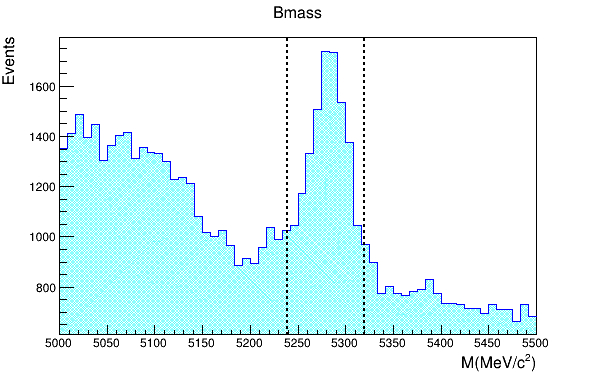

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [18]:
TCanvas *canvas = new TCanvas("Canvas","",600,400);
PPP_Bmass_fin->SetStats(0);
PPP_Bmass_fin->SetLineColor(kBlue);
PPP_Bmass_fin->SetFillStyle(3144);               PPP_Bmass_fin->SetFillColorAlpha(kCyan, 0.45);
PPP_Bmass_fin->GetXaxis()->SetTitleSize(.046);   PPP_Bmass_fin->GetYaxis()->SetTitleSize(.046);
PPP_Bmass_fin->GetYaxis()->SetTitleOffset(1.17);
PPP_Bmass_fin->GetXaxis()->SetTitle("M(MeV/c^{2})");
PPP_Bmass_fin->Draw();

TLine *l1 = new TLine(B_m + B_thresh,610,B_m + B_thresh,1790);
l1->SetLineWidth(2); l1->SetLineStyle(2);
l1->Draw();

TLine *l2 = new TLine(B_m - B_thresh,610,B_m - B_thresh,1790);
l2->SetLineWidth(2); l2->SetLineStyle(2);
l2->Draw();

canvas->Draw();

In [19]:
PPP_Bmass_fin->GetMaximum();

Comparison plot

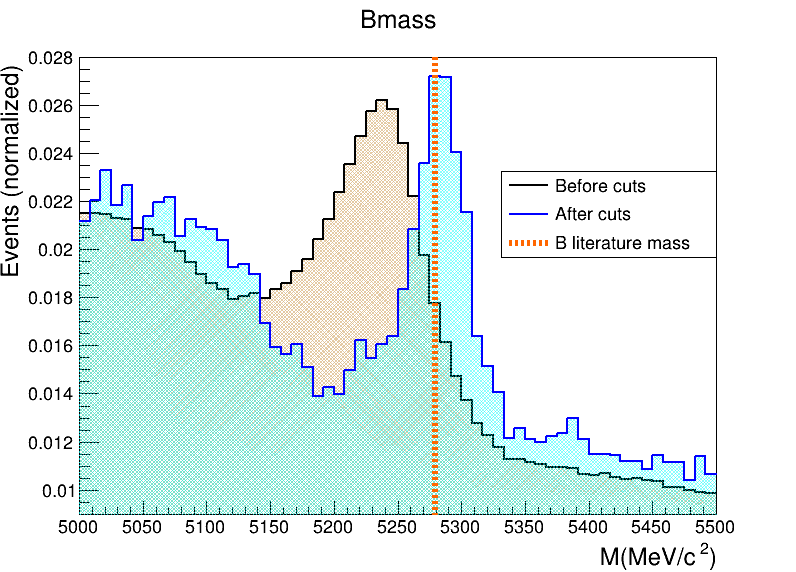

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [20]:
TH2F *hist1 = (TH2F*) PPP_Bmass_ini->Clone();
TH2F *hist2 = (TH2F*) PPP_Bmass_fin->Clone();

double maxi = 0.028;
    
double scale1 = hist1->Integral();   double scale2 = hist2->Integral();
hist1->Scale(1/scale1);              hist2->Scale(1/scale2);

TCanvas *c1 = new TCanvas("Canvas","",800,600);
hist1->SetStats(0);
hist1->GetYaxis()->SetTitle("Events (normalized)");

hist1->Draw("hist");      hist1->SetLineColor(1);  hist1->SetLineWidth(2);
hist2->Draw("samehist");  hist2->SetLineColor(4);  hist2->SetLineWidth(2);
hist1->SetFillStyle(3144);               hist1->SetFillColorAlpha(42, 0.75);
hist2->SetFillStyle(3144);               hist2->SetFillColorAlpha(kCyan, 0.45);

hist1->SetMaximum(maxi);
hist1->GetXaxis()->SetTitleSize(.046);   hist1->GetYaxis()->SetTitleSize(.046);
hist1->GetYaxis()->SetTitleOffset(1.17);

TLine *l = new TLine(B_m,0.009,B_m,maxi);
l->SetLineColor(kOrange+7); l->SetLineWidth(6); l->SetLineStyle(2);
l->Draw();

TLegend *leg = new TLegend(0.63,0.55,0.9,0.7);  // legend borders: left, bottom, right, top
leg->AddEntry(hist1, "Before cuts", "l"); 
leg->AddEntry(hist2, "After cuts", "l"); 
leg->AddEntry(l, "B literature mass", "l"); 
gStyle->SetLegendTextSize(0.035);
leg->Draw();

c1->Draw()

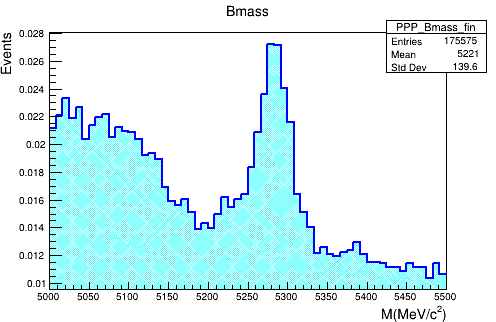

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [21]:
auto c1 = new TCanvas("c1","c1",500,350);
hist2->SetStats(1);
hist2->Draw("hist");
c1->Draw()

In [22]:
Double_t ajuste(Double_t x,Double_t *par) {
    Double_t arg = (x - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg) + (1-par[0])*exp(-par[3]*x);
    return fitval;
}

In [23]:
Double_t gaussian(Double_t x,Double_t *par) {
    Double_t arg = (x - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg);
    return fitval;
}